In [ ]:
!pip install python-dotenv
!pip install pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Lproject1

/content/drive/MyDrive/Lproject1


In [ ]:
!pwd

/content/drive/MyDrive/Lproject1


In [ ]:
!ls -a

data.csv			     sql_test.ipynb
.env				     startup_funding2018.csv
.gitignore			     startup_funding2019.csv
Indian_startup_Analysis_Copy1.ipynb  startup_funding2020.csv
.ipynb_checkpoints		     startup_funding2021.csv


In [ ]:
# importing needed libraries
from dotenv import dotenv_values
import pyodbc

import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#getting database credentials
env_vars = dotenv_values('.env')

database = env_vars.get('DATABASE')
server = env_vars.get('SERVER')
username = env_vars.get('USERNAME')
password = env_vars.get('PASSWORD')


NameError: ignored

In [ ]:
#create connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [ ]:
#create a connection to database
connection = pyodbc.connect(connection_string)

In [ ]:
#retrieve 2020 and 2021 data from database
df_20 = pd.read_sql('Select * from dbo.LP1_startup_funding2020', connection)
df_21 = pd.read_sql('Select * from dbo.LP1_startup_funding2021', connection)

In [ ]:
df_21 = pd.read_csv("/content/drive/MyDrive/code_library/Azubi_Africa_Sprint_Projects/lp1/startup_funding2021.csv")
df_20 = pd.read_csv("/content/drive/MyDrive/code_library/Azubi_Africa_Sprint_Projects/lp1/startup_funding2020.csv")
df_19 = pd.read_csv("/content/drive/MyDrive/code_library/Azubi_Africa_Sprint_Projects/lp1/startup_funding2019.csv")
df_18 = pd.read_csv("/content/drive/MyDrive/code_library/Azubi_Africa_Sprint_Projects/lp1/startup_funding2018.csv")

In [ ]:
# Inspect similarity in columns of datasets
print("2018: ", list(df_18.columns))
print("2019: ", list(df_19.columns))
print("2020: ", list(df_20.columns))
print("2021: ", list(df_21.columns))

2018:  ['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company']
2019:  ['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage']
2020:  ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage', 'column10']
2021:  ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']


# New Section

### BUSINESS UNDERSTANDING

#### *Title Of Project*
Indian Startup Funding Analysis.

#### *Project Description*
Funding is a crucial factor for the success of a start-up business, alongside ideas, team creativity, and execution. It provides the necessary capital for start-ups to think big, achieve growth, and make a lasting impact. In this project, we will analyze the funding received by start-ups in India between 2018 and 2021.  By examining this data, we aim to gain insights into the funding landscape and dynamics of the Indian start-up ecosystem during the specified time period.

#### *Hypothesis*
*H0*: The mean amount of funding received among sectors are equal.

*H1*:  The mean amount of funding received among sectors are not equal.


#### *Data mining goals and Research Questions*
1. How does funding vary across the years? Are there any specific years where funding showed a significant increase or decrease?
2. What are the top 3 companies and their sectors with the highest funding for each year?
3. Is there a correlation between the total amount of funding in a sector and the number of startups in the sector?
4. What is the distribution of funding across different stages of start-up growth during the specified time period?
5. Which Cities of startup headquarters are the top 10 headquarter cities with the highest funding.


### DATA UNDERSTANDING
**Structure, Content, Quality**



*Checking structure of datasets*

In [ ]:
df_18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [ ]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [ ]:
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [ ]:
print(df_19.shape) #this prints out the number of rowss and columns contained in the dataset file
print(df_19.info()) # this givesan immediate face value on what each column contain

(89, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None


In [ ]:
df_20.head() #preview data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,NaN
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN


In [ ]:
df_20.info() #check data structural properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [ ]:
df_21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [ ]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


### SURFACE PROPERTIES OF DATASET
**Data Set Name:** Indian Startup Funding Dataset.

**Abstract:**  The dataset we have contains comprehensive information about the start-ups, including details about their funding amounts and the investors involved.

**Data Type:** Multivariate

**Format Type:** Matrix


|      | Number of Instances |Number of Attributes | Attribute Type | Contains missing values? |
|------|----------|----------|----------|----------|
| 2018 |  526        | 6         |<ul><li>Categorical</li><li>Real</li><ul>          | Yes         |
| 2019 |  89        |   9       |   <ul><li>Categorical</li><li>Real</li><ul>           |Yes          |
| 2020 |  1055        |     10     | <ul><li>Categorical</li><li>Real</li><ul>        |    Yes      |
| 2021 |  1209      |  9         | <ul><li>Categorical</li><li>Real</li><ul>          |        Yes  |


*Checking Content and Quality of dataset*

##### 2018 Data quality assessment

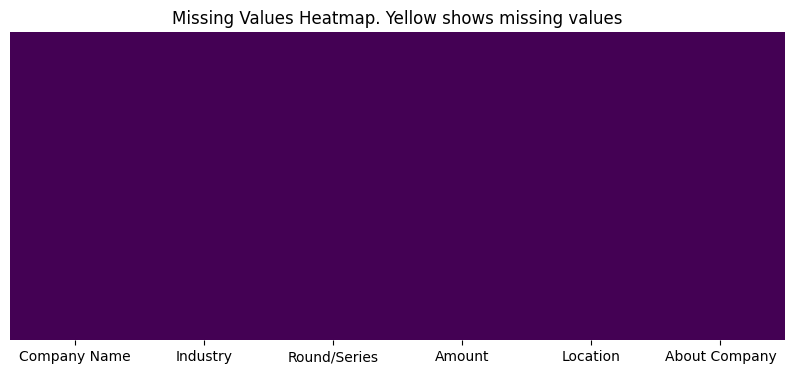

In [ ]:
# Generate a heatmap of missing values; visualizing completeness of 2020 dataset
plt.figure(figsize=(10, 4))
sns.heatmap(df_18.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap. Yellow shows missing values')
plt.show()  # looks like no missing values

In [ ]:
df_18.duplicated().sum() #one duplicate record

1

In [ ]:
#exploring categorical columns.
df_18.describe(include='object')  #missing values represented as "-"

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


In [ ]:
#explore deeper
df_18[df_18["Company Name"] == "TheCollegeFever"] #duplicate.

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [ ]:
df_18['Amount'].unique() #currency inconsistency. inappropriate missing value representation

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

##### 2019 Data quality assessment

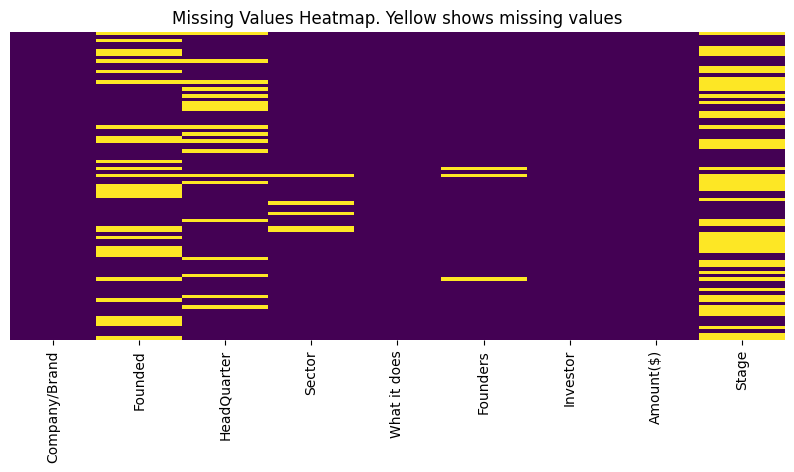

In [ ]:
# Generate a heatmap of missing values; visualizing completeness of 2020 dataset
plt.figure(figsize=(10, 4))
sns.heatmap(df_19.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap. Yellow shows missing values')
plt.show()  # no missing values

In [ ]:
na_cols = list(df_19.columns[df_19.isnull().any()]) #obtain columns with missing values
print(na_cols)

['Founded', 'HeadQuarter', 'Sector', 'Founders', 'Investor', 'Amount', 'Stage', 'column10']


In [ ]:
#display % of missing values for each column
for col in na_cols:
    print(f"% of missing values in {col}: {(df_20[col].isnull().sum() / df_20.shape[0] ) * 100:.2f}%")

% of missing values in Founded: 20.19%
% of missing values in HeadQuarter: 8.91%
% of missing values in Sector: 1.23%
% of missing values in Founders: 1.14%
% of missing values in Investor: 3.60%
% of missing values in Amount: 24.08%
% of missing values in Stage: 43.98%
% of missing values in column10: 99.81%


In [ ]:
df_19.duplicated().sum() # no duplicates

0

In [ ]:
df_19.describe(include = 'object')

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,70,84,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


In [ ]:
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [ ]:
df_19.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


##### 2020 Data quality assessment

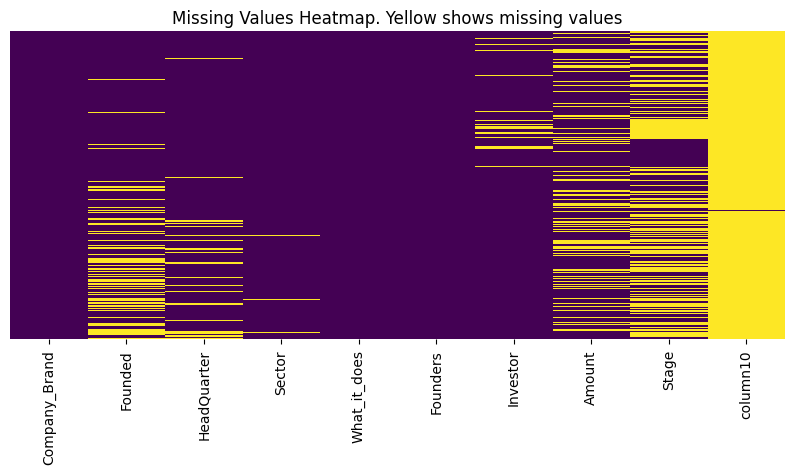

In [ ]:
# Generate a heatmap of missing values; visualizing completeness of 2020 dataset
plt.figure(figsize=(10, 4))
sns.heatmap(df_20.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap. Yellow shows missing values')
plt.show()

In [ ]:
df_20.isnull().any() # only Company_Brand and What_it_does variables don't contain missing values.

In [ ]:
na_cols = list(df_20.columns[df_20.isnull().any()]) #obtain columns with missing values
print(na_cols)

In [ ]:
#display % of missing values for each column
for col in na_cols:
    print(f"% of missing values in {col}: {(df_20[col].isnull().sum() / df_20.shape[0] ) * 100:.2f}%")

In [ ]:
df_20.duplicated().sum() # 3 duplicated records

In [ ]:
#exploring categorical columns.
df_20.describe(include='object')

In [ ]:
# let's explore deeper.
df_20[ df_20["What_it_does"] == "Provides online learning classes" ]

From the above table, the following can be inferred:
- Inconsistent labels of **Sector** and possibly **Company_Brand**. Byju's and Byju are the same entity [Source](https://byjus.com/learning/)
- Imputing missing values of **Stage** with the mode is a bad idea for the following reasons:
    -  likely to introduce bias by  giving more importance to a particular **Stage** value which may not necessary be as much important especially given the fact that the mode has a frequency of 96 and about 44% of values are missing.
    - Investors do not generally invest at the same stage of a startup. The stage at which investors choose to invest in a startup can vary                    significantly based on several factors. [Read more on when investors invest here](https://www.fundable.com/learn/resources/guides/investor/when-do-investors-invest)


In [ ]:
df_20.Stage.isnull().sum() # missing values much bigger than mode.

In [ ]:
# Check rows of company branch with highest frequency
df_20[df_20.Company_Brand == 'Nykaa']

- Inconsistent labels for both Sector and What_it_does.
- Clearly these must have different funding Stages looking at the inverstor column.
- This suggests Cosmetics and Fashion can be replaced with Ecommerce for Nykaa and perhaps others when fixing inconsistent labels .

In [ ]:
#inconsistencies in attribute values are likely to occur for Company_Brands who have recieved funding multiple times
df_20.Company_Brand.value_counts().index[df_20.Company_Brand.value_counts() > 3]

In [ ]:
df_20[df_20.Company_Brand == 'Zomato'] # clearly founded year for Zomato is 2008

In [ ]:
df_20[df_20.Company_Brand == 'Rebel Foods']

- Rebel Foods Founded in 2011 and HeadQuartered in Mumbai. It was founded in Pune but was later moved to Mumbai. [Source](https://www.easyleadz.com/company/rebel-foods-formerly-faasos)

In [ ]:
df_20[df_20.Company_Brand == 'Servify']

- Servify is a device management platform. It is considered a Tech company. [See here](https://en.wikipedia.org/wiki/Servify). Based on What_it_does, SaaS should be the most appropriate.                 

In [ ]:
df_20[df_20.Company_Brand == 'Vedantu']

- Vedantu missing founded year is 2011
- Analysing the Founded Variable missingness pattern of the dataset, company_Brand can be used to predict missing founded years

In [ ]:
#Stage variable is very important to us. Let's check it.
df_20.Stage.value_counts().index # Inconsistent labels:  Seed funding/ Seed Funding

In [ ]:
#exploring numerical columns
df_20.describe() # Founded, Amount have float type. likely non numeric value or symbols doesn't exist in this numeric column.

In [ ]:
df_20.Founded.dtype # year founded should be datetime object

In [ ]:
# exploring the Amount column indepth
df_20.Amount.describe()

In [ ]:
#visualize shape of Amount distribution. gain insight into spread, outliers, unusual spikes, gaps, skewness
df_20.Amount.hist(bins='auto', color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Funding Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show() #histogram shows presence of outliers

In [ ]:
print(df_20.Amount.max()) # max is several orders of magnitude larger than the min
print(df_20.Amount.min())

In [ ]:
#visualizing without the max value
df_20.Amount[df_20['Amount'] != df_20['Amount'].max()].hist(bins='auto', color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Funding Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()  #distribution heavily right skewed: mean will typically be larger than the median

In [ ]:
# further explore outliers through boxplot
df_20.Amount.plot.box()  #clearly this is an extreme outlier

In [ ]:
df_20.Amount[df_20['Amount'] != df_20['Amount'].max()].plot.box() # exclude max value. there are lots of outlier still
plt.show()

##### 2021 Data quality assessment

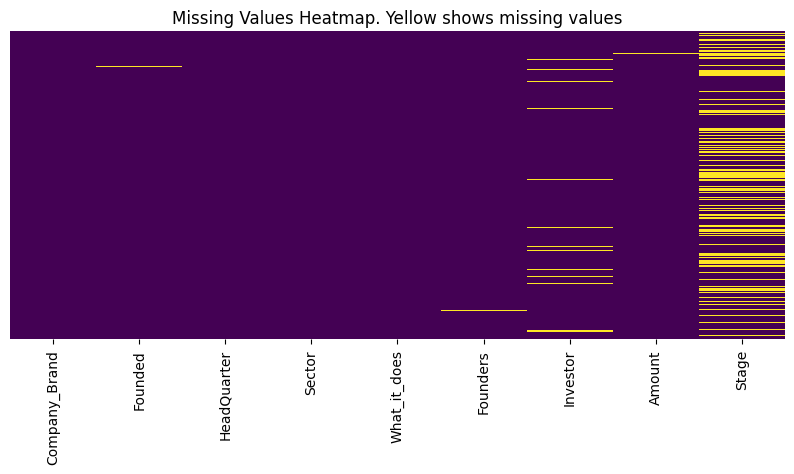

In [ ]:
# Generate a heatmap of missing values; visualizing completeness of 2021 dataset
plt.figure(figsize=(10, 4))
sns.heatmap(df_21.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap. Yellow shows missing values')
plt.show()

In [ ]:
df_21.isnull().any()

In [ ]:
na_cols = list(df_21.columns[df_21.isnull().any()]) #obtain columns with missing values
print(na_cols)

In [ ]:
#display % of missing values for each column
for col in na_cols:
    print(f"% of missing values in {col}: {(df_21[col].isnull().sum() / df_21.shape[0] ) * 100:.2f}%")

In [ ]:
df_21.duplicated().sum()

In [ ]:
#exploring categorical columns.
df_21.describe(include='object') # Acc: Amount improperly formatted,

In [ ]:
# let's explore deeper
df_21[df_21.Company_Brand == 'BharatPe'] # inconsistent Sector labels

#### DATA QUALITY ASSESSMENT REPORT

Completeness: Missing values, Incomplete records

Accuracy: Outliers, Data entry errors, Duplicates.

Consistency: Inconsistent formats, Inconsistent categories or labels, Inconsistent representations


Relevancy: Irrelevant variables, Outdated data


|      | Completeness | Accuracy | Consistency |
|------|----------|----------|----------|
| 2018 |  <ul><li>Has no missing values</li></ul>       | <ul><li></li></ul>         |          |          
| 2019 |  <ul><li></li></ul>       |          |          |          
| 2020 |<ul><li>Almost all values of **Column10** is missing.</li><li>About 44% of values of **Stage** is missing.</li><li>**Amount** and **Founded** columns have about 24% and 20% missing values respectively.</li><li>The rest have less than 10% missing values</li><li>**Sector** column has 1.23% of missing values. What_it_does column could be used to impute it</li></ul>  |  <ul><li>3 duplicated records</li><li>**Amount** contains extreme outliers. Imputing with median is more appropriate</li><li>**Amount** distribution is heavily skewed to the right, causing gross deviation from normality.</li></ul>        |  <ul><li>Inconsistent labels across **Sector**, **Stage** and possibly **Company_Brand**. eg:FinTech/fintech, Seed funding/Seed Funding, Byju/Byju's </li><li>Google search indicates Byju and Byju's refers to the same entity. **HeadQuarters** should be Bangalore**</li><li>Nakyaa has inconsistent **Sector** labels: Fashion, Cosmetics, Ecommerce</li><li>Missing **Founded** values for Zomato **Company_Brand** should be 2008</li><li>Rebel Foods **HeadQuarters** missing values should be Mumbai, **Founded** 2011. </li><li>**Sector** for Servify **Company_Brand** should be SaaS with **Founded** 2015</li><li>Vedantu **Company_Brand** missing **Founded** should be 2011</li><li>Clearly **Founded** variable missingness pattern can be predicted by **Company_Brand**</li><li>**Founded** year formatted as float</li></ul>        |  
| 2021 |  <ul><li>**Stage** column has about 35% missing values</li></ul> <ul><li>The rest have less than 10% missing values</li></ul>         |     <ul><li>19 duplicate records</li></ul><ul><li>**Amount** is wrongly formatted as object</li></ul>     |   <ul><li>Inconsistent **Sector labels**. eg: FinTech/Financial Services</li></ul>        |          




### DATA PREPARATION

Selection, Cleaning, Formatting, Integration,  Construction.  



#### Data Selection

In [ ]:
# 2018 data selection
Newdf_18 = df_18.copy() # make a copy of 2018 dataset before cleaning
Newdf_18.drop_duplicates(inplace=True)

In [ ]:
# 2019 data selection
Newdf_19 = df_19.copy()

In [ ]:
# 2020 data selection
Newdf_20 = df_20.copy() # make a copy before cleaning
del Newdf_20["column10"] # delete column 10. too many missing values.
Newdf_20.drop_duplicates(inplace=True) # delete duplicates

In [ ]:
# 2021 data selection
Newdf_21 = df_21.copy() # make a copy before cleaning
Newdf_21.drop_duplicates(inplace=True) # delete duplicates

#### Data Cleaning


##### 2018 Data Cleaning

In [ ]:
Newdf_18['Amount'].unique() #values don't indicate the rupees are generally much bigger than the dollars.

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [ ]:
#we assume all amount in USD
Newdf_18['Amount'] = Newdf_18.Amount.str.strip('₹')
Newdf_18['Amount'] = Newdf_18.Amount.str.strip('$')
Newdf_18['Amount'] = Newdf_18.Amount.apply(lambda x:str(x).replace(",",""))
Newdf_18['Amount'] = Newdf_18['Amount'].replace("—", np.nan) #replace all "—" characters with Nan values

In [ ]:
Newdf_18['Amount'].unique()

array(['250000', '40000000', '65000000', '2000000', nan, '1600000',
       '16000000', '50000000', '100000000', '150000', '1100000', '500000',
       '6000000', '650000', '35000000', '64000000', '20000000', '1000000',
       '5000000', '4000000', '30000000', '2800000', '1700000', '1300000',
       '12500000', '15000000', '104000000', '45000000', '13400000',
       '25000000', '26400000', '8000000', '60000', '9000000', '100000',
       '20000', '120000', '34000000', '342000000', '143145', '600000000',
       '742000000', '1000000000', '2000000000', '3980000', '10000',
       '250000000', '7000000', '550000000', '28500000', '240000000',
       '120000000', '2400000', '2500000000', '23000000', '11000000',
       '44000000', '3240000', '60000000', '540000000', '650000000',
       '1600000000', '900000', '10000000', '1500000', '70000000',
       '14000000', '102500000', '1200000', '5200000000', '800000',
       '1041000', '15000', '1400000', '2200000', '1800000', '3600000',
       '9500000'

In [ ]:
Newdf_18['Amount'] = Newdf_18['Amount'].astype(float) #passing Amount column as a float datatype

Newdf_18['Amount'].dtypes

dtype('float64')

In [ ]:
Newdf_18['Amount']

0        250000.00
1      40000000.00
2      65000000.00
3       2000000.00
4              NaN
          ...     
521   225000000.00
522            NaN
523        7500.00
524    35000000.00
525    35000000.00
Name: Amount, Length: 525, dtype: float64

In [ ]:
Newdf_18.isna().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

<Axes: ylabel='Amount'>

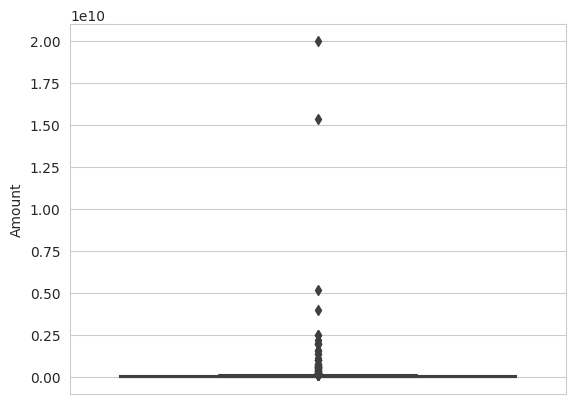

In [ ]:
## check for outliers
sns.boxplot(data=Newdf_18, y='Amount') #presence of outliers

In [ ]:
Newdf_18['Amount'].fillna(value = Newdf_18['Amount'].median(), inplace = True)

In [ ]:
Newdf_18["Round/Series"].str.title().value_counts().index

Index(['Seed', 'Series A', 'Angel', 'Venture - Series Unknown', 'Series B',
       'Series C', 'Debt Financing', 'Private Equity', 'Corporate Round',
       'Pre-Seed', 'Series E', 'Grant', 'Series D', 'Secondary Market',
       'Post-Ipo Equity', 'Undisclosed', 'Post-Ipo Debt',
       'Non-Equity Assistance', 'Series H',
       'Https://Docs.Google.Com/Spreadsheets/D/1X9Zineaz6Aunchihnmi8U6Ks7Kntr3Byy_Ybgfqaoua/Edit#Gid=1861303593',
       'Funding Round'],
      dtype='object')

In [ ]:
Newdf_18["Round/Series"] = Newdf_18["Round/Series"].str.title()
Newdf_18["Round/Series"] = Newdf_18["Round/Series"]\
.replace('Https://Docs.Google.Com/Spreadsheets/D/1X9Zineaz6Aunchihnmi8U6Ks7Kntr3Byy_Ybgfqaoua/Edit#Gid=1861303593', \
         "Notspecified"
         )

In [ ]:
def pattern_mathing(data, column, pattern):

    ''' Returns a list of values in the specified `column` of the `data` that matches the `pattern`'''

    return list({item for item in list(data[column]) if re.findall(pattern, str(item))})



In [ ]:
def value_replacement(data, column, search_list, replacement):

    '''
    Replaces all occurences of values in search_list with replacement
            value in the specified column of the data.
            data: dataframe
            column: column whose values to be replaced
            search_list: List of values to be replaced
            replacement: replacement value

     '''

    for item in search_list:
        data[column] = data[column].replace(item, replacement)

    return data[column]



In [ ]:
# match possible inconsistent labels
matches = pattern_mathing(data=Newdf_18, column="Industry", pattern=r'.*Fin.*')
Newdf_18["Industry"] = value_replacement(data=Newdf_18, column="Industry",
                                         search_list=matches, replacement="FinTech")

matches = pattern_mathing(data=Newdf_18, column="Industry", pattern=r'.*Ed.*')
Newdf_18["Industry"] = value_replacement(data=Newdf_18, column='Industry',
                                         search_list=matches, replacement='EdTech')

matches = pattern_mathing( data=Newdf_18, column='Industry', pattern=r'(Health|Wellness|Fitness)' )
Newdf_18['Industry'] = value_replacement(data=Newdf_18, column='Industry',
                                         search_list=matches, replacement='HealthTech')

matches = pattern_mathing(data=Newdf_18, column="Industry",
                          pattern=r'(commerce|Commerce|Market|Store|Tail|B2B)')
Newdf_18['Industry'] = value_replacement(data=Newdf_18, column='Industry',
                                         search_list=matches, replacement='E-Commerce')


##### 2019 Data Cleaning

###### *Handling Missing Values*

In [ ]:
Newdf_19.Stage.unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [ ]:
Newdf_19.Stage.fillna("NotSpecified", inplace=True)
Newdf_19.Founded.fillna("9999", inplace=True)

In [ ]:
Newdf_19.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [ ]:
Newdf_19[Newdf_19.Sector.isna()]  # no missingness pattern for founded year

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
41,VMate,9999,NaN,NaN,A short video platform,NaN,Alibaba,"$100,000,000",NotSpecified
49,Awign Enterprises,2016.00,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A
52,TapChief,2016.00,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A
56,KredX,9999,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B
57,m.Paani,9999,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A


In [ ]:
#Sector is imputed since it's important in mainstream analysis.
Newdf_19.Sector.fillna("Other")

0                   Ecommerce
1                      Edtech
2                      Edtech
3             Interior design
4                    AgriTech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: object

In [ ]:
Newdf_19.dtypes

Company/Brand    object
Founded          object
HeadQuarter      object
Sector           object
What it does     object
Founders         object
Investor         object
Amount($)        object
Stage            object
dtype: object

*Handling Inconsistencies*

In [ ]:
#inspect amount values
Newdf_19['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [ ]:
Newdf_19['Amount($)'] = Newdf_19['Amount($)'].replace('Undisclosed', np.nan)
Newdf_19['Amount($)'] = Newdf_19['Amount($)'].str.strip('$')
Newdf_19['Amount($)'] = Newdf_19['Amount($)'].apply(lambda x:str(x).replace(",",""))
Newdf_19['Amount($)'] = Newdf_19['Amount($)'].astype('float')
Newdf_19['Amount($)'] = Newdf_19['Amount($)'].fillna(value=Newdf_19['Amount($)'].median())

In [ ]:
#inspect amount values
Newdf_19['Amount($)'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06, 1.000e+06,
       2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05, 5.400e+08,
       1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07, 1.500e+06,
       5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07, 3.200e+07,
       2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08, 8.000e+06,
       1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06, 3.600e+07,
       5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07, 2.200e+05,
       2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06, 6.930e+08,
       3.300e+07])

##### 2020 Data Cleaning


###### *Handling Missing Values*

In [ ]:
######## 2020 handling missing vlaues #############


- **Stage Variable:**  Imputing a large proportion of missing values with a single category(the mode) may introduce bias and potentially overemphasize the importance of that category.
- Predicting it's values is also not a good idea since the other variables are not natural predictors of **Stage Variable**.
- we replace missing values with the Sentinel value 'NotSpecified'.
- A sentinel value is a specific value that is used to represent missing or unavailable data. It acts as a placeholder indicating that the original value is missing or unknown

In [ ]:
Newdf_20.Stage.fillna('NotSpecified', inplace=True)

- **Founded Variable:** We use Company_Brand to predict and impute missing values.
- The missingness pattern of the dataset justifies this decision.
- For Brands with at least one non-missing Founded year, we use the first instance of founded year to impute
- We use a sentinel value of 9999 for Company_Brand which don't have at least one non-missing Founded value in order to maintain the datetime format of the year.

In [ ]:
#inputing using first instance of founded year or 9999
Newdf_20.Founded = Newdf_20.groupby('Company_Brand')['Founded'].transform( lambda x: x.fillna(x.dropna().iloc[0]) if x.count() > 0 else 9999)


In [ ]:
#check founded year for Vedantu, Servify,  Rebel Foods
Newdf_20[Newdf_20.Company_Brand.isin(['Vedantu', 'Servify', 'Rebel Foods'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
339,Rebel Foods,2011.00,Pune,Food,"Known for its larger brands – Faasos, Behrouz ...","Jaydeep Barman, Kallol Banerjee",Coatue Management,50000000.00,NotSpecified
402,Servify,2015.00,Mumbai,Service industry,Servify is a self-learning platform that provi...,Sreevathsa Prabhakar,"Blume Ventures, Tetrao",23000000.00,Series C
425,Servify,2015.00,Mumbai,Manufacturing,Enables top OEMs & ODMs in device distribution...,Sreevathsa Prabhakar,"Blume Ventures, Tetrao",11370000.00,Series C
538,Rebel Foods,2011.00,Mumbai,Food tech,Cloud kitchen platform,"Jaydeep Barman, Kallol Bannerjee",Coatue Management,26500000.00,Series E2
568,Vedantu,2011.00,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",Coatue,100000000.00,Series D
644,Servify,2015.00,Mumbai,SaaS,Operates device management and support platform,Sreevathsa Prabhakar,"Iron Pillar, Blume Ventures",11370000.00,Series C
732,Servify,2015.00,Mumbai,NaN,It is a technology company which serves as a p...,Sreevathsa Prabhakar,Barkawi,250000.00,NotSpecified
756,Vedantu,2011.00,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",KB Global Platform Firm,6800000.00,Series C
785,Rebel Foods,2011.00,NaN,Food tech,It runs internet kitchen,"Jaydeep Barman, Kallol Bannerjee",Coatue Management,50000000.00,NotSpecified
792,Vedantu,2011.00,Bangalore,Edtech,Onine learning platform,"Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...",Legend Capital,12500000.00,Series C


In [ ]:
# inputing missing values for Amount column
Newdf_20.Amount.fillna(Newdf_20.Amount.median(), inplace=True) # impute with median. since normality is violated.

- **HeadQuaters, Founders and Investor** missing values are imputed using the 'NotSpecified' except in cases known.
- **Sector column** missing values will be predicted based on What_it_does after fixing inconsistent labels

In [ ]:
#fix inconsistent label of Byju's before imputing missing HeadQuarter values
Newdf_20.Company_Brand = Newdf_20.Company_Brand.replace("Byju", "Byju's")
Newdf_20.loc[[935, 1035], 'HeadQuarter'] = 'Bangalore'

In [ ]:
# setting Rebel Foods HeadQuarter to Mumbai
indices = list(Newdf_20[Newdf_20.Company_Brand == 'Rebel Foods'].index)
Newdf_20.loc[indices, 'HeadQuarter'] = 'Mumbai'
Newdf_20[Newdf_20.Company_Brand.isin(["Byju's", "Rebel Foods"])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
124,Byju's,2011.00,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Owl Ventures, Tiger Global Management",200000000.00,NotSpecified
339,Rebel Foods,2011.00,Mumbai,Food,"Known for its larger brands – Faasos, Behrouz ...","Jaydeep Barman, Kallol Banerjee",Coatue Management,50000000.00,NotSpecified
494,Byju's,2011.00,Bangalore,EdTech,Provides online learning classes,Byju Raveendran,DST Global,122000000.00,NotSpecified
538,Rebel Foods,2011.00,Mumbai,Food tech,Cloud kitchen platform,"Jaydeep Barman, Kallol Bannerjee",Coatue Management,26500000.00,Series E2
618,Byju's,2011.00,Bangalore,Edtech,Provides online learning classes,Byju Raveendran,BOND,3000000.00,NotSpecified
785,Rebel Foods,2011.00,Mumbai,Food tech,It runs internet kitchen,"Jaydeep Barman, Kallol Bannerjee",Coatue Management,50000000.00,NotSpecified
935,Byju's,2011.00,Bangalore,Edtech,Provides online learning classes,Byju Raveendran,General Atlantic,200000000.00,NotSpecified
946,Rebel Foods,2011.00,Mumbai,Food tech,It runs internet kitchen,"Jaydeep Barman, Kallol Bannerjee",Alteria Capital,4900000.00,NotSpecified
1035,Byju's,2011.00,Bangalore,Edtech,Provides online learning classes,Byju Raveendran,Tiger Global,200000000.00,NotSpecified


In [ ]:
# all others are imputed with 'NotSpecified' sentinel value
Newdf_20.HeadQuarter.fillna('NotSpecified', inplace=True)
Newdf_20.Investor.fillna('NotSpecified', inplace=True)
Newdf_20.Founders.fillna('NotSpecified', inplace=True)

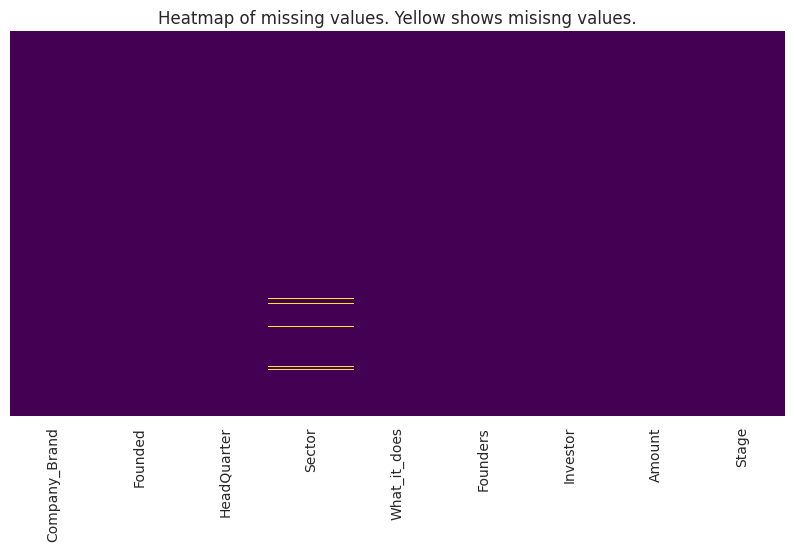

In [ ]:
#visualize progress
plt.figure(figsize=(10, 5))
sns.heatmap(Newdf_20.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title("Heatmap of missing values. Yellow shows misisng values.")
plt.show()

###### *Handling Inconsistent labels*

In [ ]:
print(Newdf_20.Stage.nunique()) # number of unique stage values
print(sorted(list(Newdf_20.Stage.value_counts().index))) # sort values

43
['Angel Round', 'Bridge', 'Bridge Round', 'Debt', 'Edge', 'Mid series', 'NotSpecified', 'Pre Series A', 'Pre seed Round', 'Pre seed round', 'Pre series A', 'Pre series A1', 'Pre series B', 'Pre series C', 'Pre- series A', 'Pre-Seed', 'Pre-Series B', 'Pre-seed', 'Pre-seed Round', 'Pre-series', 'Pre-series A', 'Pre-series B', 'Pre-series C', 'Seed', 'Seed A', 'Seed Funding', 'Seed Investment', 'Seed Round', 'Seed Round & Series A', 'Seed funding', 'Seed round', 'Series A', 'Series A-1', 'Series B', 'Series B2', 'Series C', 'Series C, D', 'Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series H']


In [ ]:
Newdf_20.Stage = Newdf_20.Stage.str.title()  # uniform renaming with title style
print(Newdf_20.Stage.nunique())
print(sorted(list(Newdf_20.Stage.value_counts().index)))

37
['Angel Round', 'Bridge', 'Bridge Round', 'Debt', 'Edge', 'Mid Series', 'Notspecified', 'Pre Seed Round', 'Pre Series A', 'Pre Series A1', 'Pre Series B', 'Pre Series C', 'Pre- Series A', 'Pre-Seed', 'Pre-Seed Round', 'Pre-Series', 'Pre-Series A', 'Pre-Series B', 'Pre-Series C', 'Seed', 'Seed A', 'Seed Funding', 'Seed Investment', 'Seed Round', 'Seed Round & Series A', 'Series A', 'Series A-1', 'Series B', 'Series B2', 'Series C', 'Series C, D', 'Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series H']


In [ ]:
def value_replacement(data, column, search_list, replacement):

    '''
    Replaces all occurences of values in search_list with replacement
            value in the specified column of the data.
            data: dataframe
            column: column whose values to be replaced
            search_list: List of values to be replaced
            replacement: replacement value

     '''

    for item in search_list:
        data[column] = data[column].replace(item, replacement)

    return data[column]


In [ ]:
#fix inconsistent Stage labels
Newdf_20.Stage = Newdf_20.Stage.replace("Bridge", "Bridge Round")
Newdf_20.Stage = value_replacement(data=Newdf_20, column="Stage",
                                   search_list=["Pre- Series A", "Pre Series A"],
                                   replacement='Pre-Series A')
value_replacement(data=Newdf_20, column="Stage",
                                   search_list=["Pre-Seed", "Pre Seed Round"],
                                   replacement="Pre-Seed Round")
Newdf_20.Stage = Newdf_20.Stage.replace( )
Newdf_20.Stage = value_replacement(data=Newdf_20, column="Stage",
                                   search_list=['Seed', 'Seed Funding', 'Seed Investment'],
                                   replacement='Seed Round')

In [ ]:
#check if all clean
print(Newdf_20.Stage.nunique())
print(sorted(list(Newdf_20.Stage.value_counts().index)))

29
['Angel Round', 'Bridge Round', 'Debt', 'Edge', 'Mid Series', 'Notspecified', 'Pre Series A1', 'Pre Series B', 'Pre Series C', 'Pre-Seed Round', 'Pre-Series', 'Pre-Series A', 'Pre-Series B', 'Pre-Series C', 'Seed A', 'Seed Round', 'Seed Round & Series A', 'Series A', 'Series A-1', 'Series B', 'Series B2', 'Series C', 'Series C, D', 'Series D', 'Series D1', 'Series E', 'Series E2', 'Series F', 'Series H']


In [ ]:
#we now fix inconsistent labels for Sector
Newdf_20.Sector.nunique()

302

In [ ]:
Newdf_20.Sector = Newdf_20.Sector.str.title() #improve uniformity in naming
print(Newdf_20.Sector.nunique())

285


In [ ]:
print(sorted(list(Newdf_20.Sector.value_counts().index))) # preview values

['Accomodation', 'Ad-Tech', 'Aero Company', 'Agri Tech', 'Agriculture', 'Agritech', 'Agritech Startup', 'Agritech/Commerce', 'Ai', 'Ai & Data Science', 'Ai & Debt', 'Ai & Deep Learning', 'Ai & Media', 'Ai Company', 'Ai Health', 'Ai Platform', 'Ai Robotics', 'Ai Startup', 'Api Platform', 'Appliance', 'Ar Platform', 'Ar Startup', 'Ar/Vr', 'Ar/Vr Startup', 'Auto-Tech', 'Automation', 'Automation Tech', 'Automobile', 'Automobile Technology', 'Automobiles', 'Automotive', 'Automotive And Rentals', 'Automotive Company', 'Automotive Startup', 'Automotive Tech', 'Ayurveda Tech', 'B2B', 'B2B Agritech', 'B2B Marketplace', 'Battery Design', 'Battery Manufacturer', 'Beauty', 'Beauty & Wellness', 'Beverage', 'Beverages', 'Bike Marketplace', 'Biomaterial Startup', 'Biopharma', 'Biotech', 'Biotechnology Company', 'Blockchain', 'Blockchain Startup', 'Car Service', 'Car Trade', 'Cleantech', 'Cloud Company', 'Cloud Kitchen', 'Co-Living', 'Co-Working', 'Co-Working Startup', 'Construction', 'Construction Te

In [ ]:
for i in range(1, 10):  #there are 285 unique values. 188 values occur exactly once.
    print(f'{len(Newdf_20.Sector.value_counts().index[Newdf_20.Sector.value_counts() > i])} \
    sectors occurs more than {i}')

97     sectors occurs more than 1
70     sectors occurs more than 2
49     sectors occurs more than 3
37     sectors occurs more than 4
28     sectors occurs more than 5
23     sectors occurs more than 6
21     sectors occurs more than 7
20     sectors occurs more than 8
20     sectors occurs more than 9


In [ ]:
#we focus on fixing inconsistent labels of sectors with high frequency
def high_freq_sectors(freq):
    ''' Print sectors with frequency greater than `freq`.'''

    print(len(Newdf_20.Sector.value_counts()[Newdf_20.Sector.value_counts() > freq]))
    print(Newdf_20.Sector.value_counts()[Newdf_20.Sector.value_counts() > freq])

high_freq_sectors(freq=9)

20
Fintech          131
Edtech           106
Healthtech        42
Agritech          38
E-Commerce        33
Saas              24
Ecommerce         22
Media             19
Tech              19
Ai                18
Logistics         16
Gaming            16
Saas Startup      15
Foodtech          15
Healthcare        14
Tech Startup      14
Ai Startup        13
Food              12
Entertainment     12
Tech Company      10
Name: Sector, dtype: int64


In [ ]:
def pattern_mathing(data, column, pattern):

    ''' Returns a list of values in the specified `column` of the `data` that matches the `pattern`'''

    return list({item for item in list(data[column]) if re.findall(pattern, str(item))})


In [ ]:
# match possible inconsistent labels of FinTech
matches = pattern_mathing(data=Newdf_20, column="Sector", pattern=r'.*Fin.*')
matches #these are all finTechs

['Finance Company',
 'Finance',
 'Online Financial Service',
 'Financial Services',
 'Fintech']

In [ ]:
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='FinTech')
high_freq_sectors(freq=9)

20
FinTech          142
Edtech           106
Healthtech        42
Agritech          38
E-Commerce        33
Saas              24
Ecommerce         22
Tech              19
Media             19
Ai                18
Logistics         16
Gaming            16
Foodtech          15
Saas Startup      15
Healthcare        14
Tech Startup      14
Ai Startup        13
Entertainment     12
Food              12
Tech Company      10
Name: Sector, dtype: int64


In [ ]:
matches = pattern_mathing(data=Newdf_20, column="Sector", pattern=r'.*Ed.*')
matches

['Edtech Startup',
 'Edttech',
 'Edtech',
 'Education',
 'Healthcare/Edtech',
 'Saas/Edtech']

In [ ]:
#let's preview to understand the services.
pd.set_option('display.max_colwidth', None) # stop truncation of string cols.

def previewer(values):

    ''' returns the sector and What_it_does of all sectors in the `values` parameter'''

    return Newdf_20[['Sector', 'What_it_does']][Newdf_20.Sector.isin(values)]


In [ ]:
previewer(values=['SaaS/Edtech', 'Education', 'Healthcare/Edtech']) #values that are likely to mean different things from EdTech
#it's safe to assume all these can be classified as EdTech because of words like global audience, platform etc
#suggests usage of tech to enhance their education services

,Sector,What_it_does
472,Education,Bring world-class business and professional education to a global audience
473,Education,"India's largest exam preparation destination,"
497,Healthcare/Edtech,Healthcare training company


In [ ]:
#fix inconsistent EdTech labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='EdTech')

In [ ]:
matches = pattern_mathing( data=Newdf_20, column='Sector', pattern=r'(Health|Wellness|Fitness)' )
matches

['Healthcare',
 'Yoga & Wellness',
 'Health & Wellness',
 'Mental Health',
 'Beauty & Wellness',
 'Fitness Startup',
 'Healthtech',
 'Health And Fitness',
 'Ai Health',
 'Fitness',
 'Health']

In [ ]:
previewer(values=['Health',  'Health And Fitness', 'Health & Wellness', 'Ai Health']) # seems these use tech to enhance services.

,Sector,What_it_does
463,Health,"An India online platform, which provides pharmacy, diagnostics, and e-consultation in India."
476,Health,The largest provider of physiotherapy and rehabilitation services
490,Ai Health,Organic superfoods & free personal health coaching that actually work.
567,Health & Wellness,Focusses on reversing chronic lifestyle disorders through functional nutrition.
590,Health & Wellness,It sells herbal OTC products
615,Health & Wellness,Digital platform that offers sexologist consultations for men
782,Health,Offers health supplements related gummies
817,Health And Fitness,"Integrated platform for food, fitness and meditation."


In [ ]:
#fix inconsistent HealthTech labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='HealthTech')

In [ ]:
matches = pattern_mathing(data=Newdf_20, column="Sector", pattern=r'(commerce|Commerce|Market|Store|Tail|B2B)')
print(matches)  # social e-commerce is just a branch of e-commerce.

['E-Market', 'B2B', 'Sles And Marketing', 'Marketing Company', 'Social E-Commerce', 'E-Tail', 'Social Commerce', 'B2B Agritech', 'E Tailor', 'Bike Marketplace', 'Marketplace', 'E Store', 'Marketing', 'Content Marketplace', 'Marketing Startup', 'Ecommerce', 'E-Commerce', 'Agritech/Commerce', 'B2B Marketplace']


In [ ]:
previewer(values=['Marketing Company', 'Sles And Marketing', 'Marketing']) # these are marketing

,Sector,What_it_does
54,Marketing Company,"TagMango is a marketing and advertising app that helps influencer, and brands to partner with individuals."
240,Sles And Marketing,"Slintel, a leader in capturing technographics-powered buying intent, helps companies uncover the 3% of active buyers in their target market."
928,Marketing,Customer analytics and cross-channel engagement platform


In [ ]:
previewer(values=['Social Commerce', 'E-Market', 'B2B Marketplace', 'E Store', 'E-Tail', 'E Tailor', 'Content Marketplace']) # all these are e-commerce

,Sector,What_it_does
270,Content Marketplace,Pepper Content is a Content-Mediation Platform that connects talented writers to organisations that require content.
436,Social Commerce,"Social Commerce Venture for Wellness. View company info, jobs, team members, culture, funding and more."
498,Social Commerce,Connects new-age digital first brands with relevant sellers
548,Social Commerce,A video and livestream led commerce platform that makes online shopping engaging
563,B2B Marketplace,Provides a platform for manufacturers and retailers in digital transaction
790,E Store,Online grocery store
858,E-Market,Retail Aggregator
874,E-Tail,Used car retailing platform
910,Social Commerce,It enables community opinion influencers to sell products to thousands of micro-communities in India
933,E-Market,Online home furniture marketplace


In [ ]:
matches = [ x for x in matches if x not in ['Marketing Company', 'Sles And Marketing', 'Marketing', 'Marketing Startup'] ]
matches #E-commerce inconsistent labels

['E-Market',
 'B2B',
 'Social E-Commerce',
 'E-Tail',
 'Social Commerce',
 'B2B Agritech',
 'E Tailor',
 'Bike Marketplace',
 'Marketplace',
 'E Store',
 'Content Marketplace',
 'Ecommerce',
 'E-Commerce',
 'Agritech/Commerce',
 'B2B Marketplace']

In [ ]:
#fix inconsist e-commmerce and market labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector',
search_list=matches, replacement='E-commerce')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector',
                                    search_list=['Marketing Company', 'Sles And Marketing', 'Marketing', 'Marketing Startup'],
                                    replacement='Marketing')


In [ ]:
high_freq_sectors(freq=9)

18
FinTech          142
EdTech           115
E-commerce        84
HealthTech        76
Agritech          38
Saas              24
Tech              19
Media             19
Ai                18
Logistics         16
Gaming            16
Saas Startup      15
Foodtech          15
Tech Startup      14
Ai Startup        13
Food              12
Entertainment     12
Tech Company      10
Name: Sector, dtype: int64


In [ ]:
matches = pattern_mathing(data=Newdf_20, column='Sector', pattern=r'Saas')
matches

['Saas',
 'Saas\xa0\xa0Startup',
 'Saas Platform',
 'Solar Saas',
 'Saas Startup',
 'Vr & Saas',
 'Travel & Saas']

In [ ]:
#fix inconsistent Saas labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='SaaS')

In [ ]:
matches = pattern_mathing(data=Newdf_20, column='Sector', pattern=r'Agri')
matches

['Agriculture',
 'Agritech Startup',
 'Supply Chain, Agritech',
 'Agritech',
 'Agri Tech']

In [ ]:
#fix inconsistent AgriTech labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='AgriTech')

In [ ]:
matches = pattern_mathing(data=Newdf_20, column='Sector', pattern='(Media|Gaming|Entertainment)')
matches

['Entertainment',
 'Media & Networking',
 'Media',
 'Visual Media',
 'Ai & Media',
 'Digital Media',
 'Media Tech',
 'Gaming',
 'Social Media',
 'Gaming Startup']

In [ ]:
previewer(values=matches)

,Sector,What_it_does
20,Gaming,EWar Games is a e-sports and real-time gaming start-up.
67,Gaming Startup,Bombay Play is a Card and Toy Company Making games for India.
74,Gaming Startup,"Gamerji is an online esports gaming platform where tournaments are created for different games such as PUBG, COD, Free Fire etc."
94,Gaming,Mobile Premier League is a skill-based eSports platform used to offer cash prizes while playing games.
98,Digital Media,NewsReach India offers partner publications a digital footprint and monetisation of their content via advertisements.
...,...,...
938,Media,Multi-channel broadcast network
940,Media,Stock photo industry
944,Media,A podcast platform
1008,Gaming,Esports tournament platform


In [ ]:
Newdf_20.loc[389, 'What_it_does'] # Media, Entertainment and Gaming have overlapping services.

'AFK Gaming is a media and entertainment and gaming company located in Mumbai.'

In [ ]:
#fix inconsistent Entertainment & media labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='Entertainment & Media')

In [ ]:
matches = pattern_mathing(data=Newdf_20, column='Sector',pattern='Food')
matches

['Food',
 'Food Tech',
 'Foodtech',
 'Food & Bevarages',
 'Food Diet',
 'Foodtech & Logistics',
 'Food And Beverages',
 'Food Industry',
 'Food Devlivery',
 'Food & Logistics',
 'Food Startup',
 'Food & Beverages',
 'Food Delivery']

In [ ]:
Newdf_20.loc[[645, 661, 730, 770], ['Sector', 'What_it_does']] # we assume food and foodtech are same industry.

,Sector,What_it_does
645,Food,It runs yoghurt brand Epigamia
661,Foodtech,Provides healthy snacks for kids
730,Food,Online paltform to order biryani
770,Foodtech,Enables to order food online


In [ ]:
#fix FoodTech inconsistent labels
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='FoodTech')

In [ ]:
matches = pattern_mathing(data=Newdf_20, column='Sector', pattern='Ai')
matches

['Ai & Data Science',
 'Ai Startup',
 'Ai & Deep Learning',
 'Deep Tech Ai',
 'Ai Robotics',
 'Ai Platform',
 'Conversational Ai Platform',
 'Ai Company',
 'Ai',
 'Ai & Debt']

In [ ]:
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='AI')

In [ ]:
matches = ['Tech Startup', 'Tech Company', 'Tech Hub', 'Tech Platform', 'Technology', 'Techonology']
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=matches, replacement='Tech')
high_freq_sectors(freq=5)

18
FinTech                  142
EdTech                   115
E-commerce                84
HealthTech                76
Entertainment & Media     64
FoodTech                  50
Tech                      49
SaaS                      47
AgriTech                  42
AI                        40
Logistics                 16
Iot                        8
Automobile                 7
Fashion                    7
Hr Tech                    6
Cosmetics                  6
Real Estate                6
Retail                     6
Name: Sector, dtype: int64


In [ ]:
print(sorted(list(Newdf_20.Sector.value_counts().index)))

['AI', 'Accomodation', 'Ad-Tech', 'Aero Company', 'AgriTech', 'Api Platform', 'Appliance', 'Ar Platform', 'Ar Startup', 'Ar/Vr', 'Ar/Vr Startup', 'Auto-Tech', 'Automation', 'Automation Tech', 'Automobile', 'Automobile Technology', 'Automobiles', 'Automotive', 'Automotive And Rentals', 'Automotive Company', 'Automotive Startup', 'Automotive Tech', 'Ayurveda Tech', 'Battery Design', 'Battery Manufacturer', 'Beauty', 'Beverage', 'Beverages', 'Biomaterial Startup', 'Biopharma', 'Biotech', 'Biotechnology Company', 'Blockchain', 'Blockchain Startup', 'Car Service', 'Car Trade', 'Cleantech', 'Cloud Company', 'Cloud Kitchen', 'Co-Living', 'Co-Working', 'Co-Working Startup', 'Construction', 'Construction Tech', 'Consultancy', 'Consumer Appliances', 'Consumer Goods', 'Content Management', 'Content Marktplace', 'Cosmetics', 'Coworking', 'Craft Beer', 'Crowdsourcing', 'Cryptocurrency', 'Customer Service Company', 'Dairy', 'Dairy Startup', 'Data Analytics', 'Data Intelligence', 'Data Science', 'Dat

In [ ]:
#Now we focus on some relatively less frequently occuring Sectors
Newdf_20.Sector = Newdf_20.Sector.replace('Logitech', 'Logistics')
Newdf_20.Sector = Newdf_20.Sector.replace('Proptech', 'Real Estate')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Iot', 'Iot Startup', 'Iot/Automobile'], replacement='IoT')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Automobile', 'Automobile Technology', \
                        'Automobiles', 'Automotive', 'Automotive And Rentals', 'Automotive Company', 'Automotive Startup', 'Automotive Tech'],
                        replacement='Automobile')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Fashion', 'Fashion Startup', 'Fashion Tech'], replacement='Fashion')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Hr', 'Hr Tech', 'Hrtech', 'Hr Tech Startup'], replacement='HrTech')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Retail Aggregator', 'Retail Startup', 'Retail Tech', 'Retail'],
                                    replacement='Retail')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Ar Platform', 'Ar Startup', 'Ar/Vr', 'Ar/Vr Startup'],
                                    replacement='Ar/Vr')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Auto-Tech', 'Automation', 'Automation Tech'], replacement='Auto-Tech')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector',
                                    search_list=['Video Sharing Platform', 'Video Personalization', 'Video Platform', 'Video', \
                                                 'Video Streaming Platform'], replacement='Video Platform')
Newdf_20.Sector = value_replacement(data=Newdf_20, column='Sector', search_list=['Traveltech', 'Travel Tech', 'Travel'], replacement='IoT')

In [ ]:
print(sorted(list(Newdf_20.Sector.value_counts().index))) #sufficiently clean

['AI', 'Accomodation', 'Ad-Tech', 'Aero Company', 'AgriTech', 'Api Platform', 'Appliance', 'Ar/Vr', 'Auto-Tech', 'Automobile', 'Ayurveda Tech', 'Battery Design', 'Battery Manufacturer', 'Beauty', 'Beverage', 'Beverages', 'Biomaterial Startup', 'Biopharma', 'Biotech', 'Biotechnology Company', 'Blockchain', 'Blockchain Startup', 'Car Service', 'Car Trade', 'Cleantech', 'Cloud Company', 'Cloud Kitchen', 'Co-Living', 'Co-Working', 'Co-Working Startup', 'Construction', 'Construction Tech', 'Consultancy', 'Consumer Appliances', 'Consumer Goods', 'Content Management', 'Content Marktplace', 'Cosmetics', 'Coworking', 'Craft Beer', 'Crowdsourcing', 'Cryptocurrency', 'Customer Service Company', 'Dairy', 'Dairy Startup', 'Data Analytics', 'Data Intelligence', 'Data Science', 'Dating App', 'Deep Tech', 'Deeptech', 'Deeptech Startup', 'Defense Tech', 'Deisgning', 'Digital Tech', 'E-Connect', 'E-Mobility', 'E-commerce', 'EdTech', 'Electricity', 'Emobility', 'Entertainment & Media', 'Entreprenurship',

In [ ]:
high_freq_sectors(freq=5)

18
FinTech                  142
EdTech                   115
E-commerce                84
HealthTech                76
Entertainment & Media     64
FoodTech                  50
Tech                      49
SaaS                      47
AgriTech                  42
AI                        40
Logistics                 21
Automobile                20
IoT                       15
Retail                    11
Fashion                   10
Real Estate                9
HrTech                     9
Cosmetics                  6
Name: Sector, dtype: int64


*Imputing Sector Variable Missing Values*

In [ ]:
Newdf_20[['Company_Brand', 'What_it_does']][Newdf_20.Sector.isna()]  #size of missing values manageable. imputed by using What_it_does

,Company_Brand,What_it_does
518,Text Mercato,Cataloguing startup that serves ecommerce platforms
569,Magicpin,"It is a local discovery, rewards, and commerce platform"
687,Leap Club,Community led professional network for women
699,Juicy Chemistry,It focuses on organic based skincare products
707,Magicpin,"It is a local discovery, rewards, and commerce platform"
732,Servify,It is a technology company which serves as a platform for brands to offer end-to-end solutions to their users
746,Wagonfly,Contactless shopping and delivery experience by using radio frequency to tag retail items
763,DrinkPrime,Water purifier subscription service
809,Kitchens Centre,Offers solutions to cloud kitchens by providing commercial space and kitchen infrastructure to assisting with branding and other services
918,Innoviti,Digital payments solutions company


In [ ]:
#using AI assisted predictions, we predict sector based on What_it_does
Newdf_20.loc[518, 'Sector'] = 'Tech'
Newdf_20.loc[[707, 569], 'Sector'] = 'E-commerce'
Newdf_20.loc[687, 'Sector'] = 'Networking Platform'
Newdf_20.loc[699, 'Sector'] = 'Cosmetics'
Newdf_20.loc[732, 'Sector'] = 'Tech'
Newdf_20.loc[746, 'Sector'] = 'E-commerce'
Newdf_20.loc[763, 'Sector'] = 'Water Subscription Services'
Newdf_20.loc[809, 'Sector'] = 'Cloud Kitchen'
Newdf_20.loc[918, 'Sector'] = 'FinTech'
Newdf_20.loc[926, 'Sector'] = 'Construction'
Newdf_20.loc[1012, 'Sector'] = 'EdTech'
Newdf_20.loc[1031, 'Sector'] = 'Creative Writing Platform'

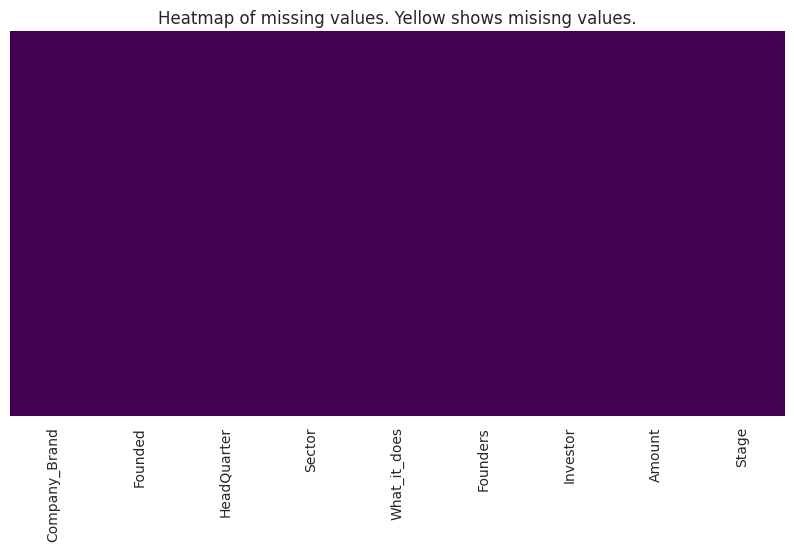

In [ ]:
#2020 data cleaned.
plt.figure(figsize=(10, 5))
sns.heatmap(Newdf_20.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title("Heatmap of missing values. Yellow shows misisng values.")
plt.show()

##### 2021 Data Cleaning

###### *Handling Missing Values*

In [ ]:
Newdf_21['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

In [ ]:
Newdf_21['Amount'] = Newdf_21.Amount.str.strip('$')
Newdf_21['Amount'] = Newdf_21.Amount.apply(lambda x:str(x).replace(",",""))

In [ ]:
non_numeric_Amount = Newdf_21.Amount[Newdf_21.Amount.str.contains('^\D*$')]\
                      .str.title() # extract non numeric amount values
unexpected_Amount_values = non_numeric_Amount[non_numeric_Amount != 'Undisclosed']
unexpected_Amount_values

86                                 Nan
98                            Upsparks
242                           Series C
257                               Seed
538                       Ah! Ventures
545                       Pre-Series A
551      Ito Angel Network Letsventure
674                                Nan
677     Jito Angel Network Letsventure
1100                               Nan
1137                                  
1146                                  
1148                              Seed
Name: Amount, dtype: object

In [ ]:
Newdf_21[Newdf_21.Amount.str.title().isin(list(unexpected_Amount_values.values))]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
86,Onsurity,2020.00,Bangalore,HealthCare,Onsurity is an employee healthcare platform providing a monthly healthcare membership with group health insurance to emerging businesses.,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",nan,NaN
98,FanPlay,2020.00,Computer Games,Computer Games,A real money game app specializing in trivia games,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
242,Fullife Healthcare,2009.00,Pharmaceuticals\t#REF!,Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
257,MoEVing,2021.00,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
538,Little Leap,2020.00,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in age range 5-15,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.00,Noida,EdTech,A tech solution for end to end career advisory to students looking to study abroad.,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,NaN
551,BHyve,2020.00,Mumbai,Human Resources,A Future of Work Platform for diffusing Employee Tacit Knowledge and enabling Peer Learning Networks,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",ITO Angel Network LetsVenture,$300000
674,MYRE Capital,2020.00,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,nan,$6000000
677,Saarthi Pedagogy,2015.00,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serving to school as an academic growth partner and provide 360° solutions to schools on Academic Strategies",Pedagogy,Sushil Agarwal,JITO Angel Network LetsVenture,$1000000
1100,Sochcast,2020.00,Online Media\t#REF!,Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience,"CA Harvinderjit Singh Bhatia, Garima Surana, Anil Srivatsa","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,nan,NaN


In [ ]:
 #resolving inconsistency
Newdf_21.loc[86, "Stage"] =  "NotSpecified"
Newdf_21.loc[86, "Amount"] =  np.nan
Newdf_21.loc[98, "Amount"] = 1200000
Newdf_21.loc[98, "Stage"] = "NotSpecified"
Newdf_21.loc[242, "Amount"] = 22000000
Newdf_21.loc[242, "Stage"] = "Series C"
Newdf_21.loc[257, "Amount"] = 5000000
Newdf_21.loc[257, "Stage"] = "Seed"
Newdf_21.loc[538, "Amount"] =  300000
Newdf_21.loc[538, "Stage"] =  "NotSpecified"
Newdf_21.loc[545, "Stage"] =  "Pre-series A"
Newdf_21.loc[545, "Amount"] =  1000000
Newdf_21.loc[551, "Stage"] =  "NotSpecified"
Newdf_21.loc[551, "Amount"] =  300000
Newdf_21.loc[674, "Stage"] =  "NotSpecified"
Newdf_21.loc[674, "Amount"] =  6000000
Newdf_21.loc[677, "Stage"] =  "NotSpecified"
Newdf_21.loc[677, "Amount"] =  1000000
Newdf_21.loc[1100, "Stage"] =  "NotSpecified"
Newdf_21.loc[1100, "Amount"] =  np.nan
Newdf_21.loc[1148, "Stage"] = "Seed"
Newdf_21.loc[1148, "Amount"] = np.nan
Newdf_21.Amount.replace("", np.nan, inplace=True)
Newdf_21.Amount.replace("Undisclosed", np.nan, inplace=True)
Newdf_21.Amount.replace("undisclosed", np.nan, inplace=True)

In [ ]:
Newdf_21[Newdf_21.Amount.str.title().isin(unexpected_Amount_values)] #unexpected Amount values resolved

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [ ]:
Newdf_21.Amount.unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', 1200000, '12000000', '1700000', '150000000',
       '100000000', '225000000', '6700000', '1300000', '20000000',
       '250000', '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000'

In [ ]:
Newdf_21["Amount"] = Newdf_21.Amount.astype(float) # change Amount datatype

<Axes: ylabel='Amount'>

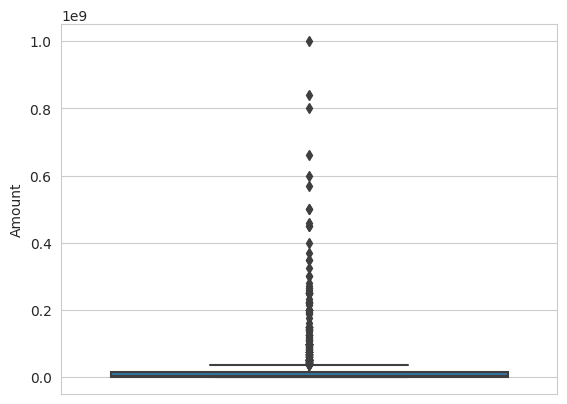

In [ ]:
## check for outliers
sns.boxplot(data=Newdf_21[Newdf_21.Amount != Newdf_21.Amount.max()], y='Amount')

In [ ]:
# presence of outliers, use median
Newdf_21["Amount"] = Newdf_21.Amount.fillna(Newdf_21.Amount.median())

In [ ]:
#impute stage, investors and founders missing values
Newdf_21.Stage.fillna("NotSpecified", inplace=True)
Newdf_21.Investor.fillna("NotSpecified", inplace=True)
Newdf_21.Founders.fillna("NotSpecified", inplace=True)

In [ ]:
Newdf_21[Newdf_21['Founded'].isna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
137,Smart Express,NaN,Mumbai,Logistics,India’s Most Innovative and Awarded Express Logistics Company.,Yogesh Dhingra,"IIFL India Private Equity Fund, Smiti Holding & Trading Company",10000000.00,Seed


Smart Express is founded in 2018. [source](https://www.crunchbase.com/organization/smart-express-60da)

In [ ]:
Newdf_21.loc[137, 'Founded'] = 2018

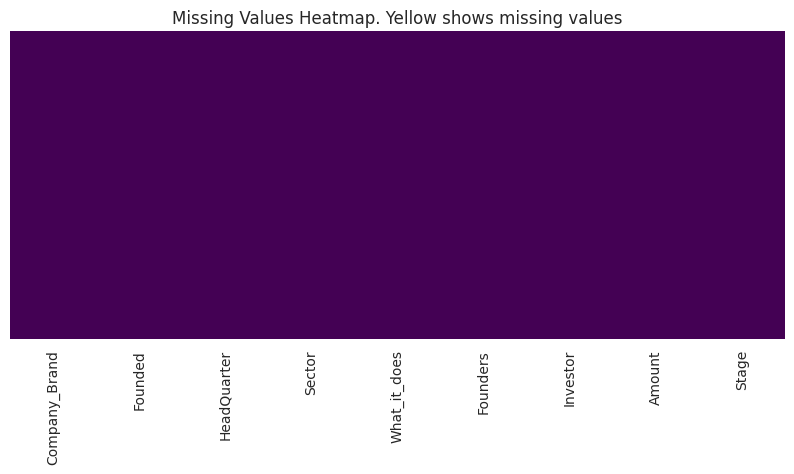

In [ ]:
# 2021 Data Cleaned
plt.figure(figsize=(10, 4))
sns.heatmap(Newdf_21.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap. Yellow shows missing values')
plt.show()

#### Data Formatting

In [ ]:
Newdf_18 = Newdf_18.rename(columns={'Company Name':'Company_Brand', 'Industry':'Sector', \
                 'Round/Series':'Stage', 'Location':'HeadQuarter', 'About Company':'What_it_does'})
Newdf_18 = Newdf_18[['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Amount', 'Stage']]
Newdf_19 = Newdf_19.rename(columns={'Company/Brand':'Company_Brand', 'Amount($)':'Amount', \
                                    'What it does':'What_it_does'})
Newdf_18.head()

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage
0,TheCollegeFever,"Bangalore, Karnataka, India",E-Commerce,"TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.",250000.00,Seed
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy farmers in rural Maharashtra.,40000000.00,Seed
2,MyLoanCare,"Gurgaon, Haryana, India",FinTech,Leading Online Loans Marketplace in India,65000000.00,Series A
3,PayMe India,"Noida, Uttar Pradesh, India",FinTech,PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.,2000000.00,Angel
4,Eunimart,"Hyderabad, Andhra Pradesh, India",E-Commerce,Eunimart is a one stop solution for merchants to create a difference by selling globally.,6000000.00,Seed


In [ ]:
print("2018: ", list(Newdf_18.columns))
print("2019: ", list(Newdf_19.columns))
print("2020: ", list(Newdf_20.columns))
print("2021: ", list(Newdf_21.columns))

2018:  ['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Amount', 'Stage']
2019:  ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
2020:  ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
2021:  ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']


In [ ]:
Newdf_18.Stage = pd.Categorical(Newdf_18.Stage) #had limited category. improves memory efficiency
Newdf_18.dtypes

Company_Brand      object
HeadQuarter        object
Sector             object
What_it_does       object
Amount            float64
Stage            category
dtype: object

In [ ]:
Newdf_19.Stage = pd.Categorical(Newdf_19.Stage) #had limited category. improves memory efficiency
Newdf_19.dtypes

Company_Brand      object
Founded            object
HeadQuarter        object
Sector             object
What_it_does       object
Founders           object
Investor           object
Amount            float64
Stage            category
dtype: object

In [ ]:
Newdf_20.Stage = pd.Categorical(Newdf_20.Stage) #had limited category. improves memory efficiency
Newdf_20.dtypes

Company_Brand      object
Founded           float64
HeadQuarter        object
Sector             object
What_it_does       object
Founders           object
Investor           object
Amount            float64
Stage            category
dtype: object

In [ ]:
Newdf_21.Stage = pd.Categorical(Newdf_21.Stage) #had limited category. improves memory efficiency
Newdf_21.dtypes

Company_Brand      object
Founded           float64
HeadQuarter        object
Sector             object
What_it_does       object
Founders           object
Investor           object
Amount            float64
Stage            category
dtype: object

#### Data Integration

In [ ]:
# merge all datasets
Newdf_18["Year"] = 2018
Newdf_19["Year"] = 2019
Newdf_20["Year"] = 2020
Newdf_21["Year"] = 2021
data = pd.concat([Newdf_18, Newdf_19, Newdf_20, Newdf_21], ignore_index=True)

In [ ]:
def pattern_mathing(data, column, pattern):

    ''' Returns a list of values in the specified `column` of the `data` that matches the `pattern`'''

    return list({item for item in list(data[column]) if re.findall(pattern, str(item))})

In [ ]:
#resolving extra inconsistencies after merging
data["Sector"] = data["Sector"].replace("—", "other")
data["Sector"] = data["Sector"].replace("E-commerce", "E-Commerce")
matches = pattern_mathing(data=data, column='Sector', pattern=r'.*Logi.*')
data["Sector"] = value_replacement(data=data, column='Sector',  search_list=matches, replacement="Logistics")

matches = pattern_mathing(data=data, column='Sector', pattern="(AI|Artificial Intelligence)")
data["Sector"] = value_replacement(data=data, column='Sector',  search_list=matches, replacement="AI")
matches = pattern_mathing(data=data, column="HeadQuarter", pattern="(Bangalore|Bengaluru)")
data["HeadQuarter"] = value_replacement(data=data, column='HeadQuarter',  search_list=matches, replacement="Bengaluru")

matches = pattern_mathing(data=data, column="HeadQuarter", pattern="Mumbai")
data["HeadQuarter"] = value_replacement(data=data, column='HeadQuarter',  search_list=matches, replacement="Bengaluru")

In [ ]:
data.Stage.value_counts().index

Index(['Undisclosed', 'Seed', 'Series A', 'Pre-Series A', 'Series B',
       'Series C', 'Series D', 'Pre-seed', 'Debt', 'Angel',
       'Venture - Series Unknown', 'Series E', 'Pre-Seed Round',
       'Debt Financing', 'Series F', 'Private Equity', 'Pre-series B',
       'Bridge', 'Pre series A', 'Corporate Round', 'Pre-Series B', 'Pre-Seed',
       'Pre-series A1', 'Grant', 'Series H', 'Series G', 'Post-Ipo Equity',
       'Secondary Market', 'Post-Ipo Debt', 'Pre Series B', 'Series B2',
       'Pre-series', 'Pre-Series C', 'Series D1', 'Early seed', 'PE',
       'Series B3', 'Series A+', 'Series F2', 'Series F1', 'Series A2',
       'Mid Series', 'Series C, D', 'Pre-Series', 'Pre Series C', 'Series E2',
       'Pre Series A1', 'Seed Round & Series A', 'Series A-1', 'Seed A',
       'Edge', 'Series B+', 'Post series A', 'Fresh funding', 'Funding Round',
       'Non-Equity Assistance', 'Series I'],
      dtype='object')

In [ ]:
data["Stage"] = value_replacement(data=data, column='Stage',
                          search_list=['Notspecified','NotSpecified'],
                          replacement='Undisclosed')
data["Stage"] = value_replacement(data=data, column='Stage',
                          search_list=['Seed Round','Seed+', 'Seed funding', 'Seed fund','Seed round'],
                          replacement='Seed')
data["Stage"] = data["Stage"].replace("Seies A", "Series A")
data["Stage"] = data["Stage"].replace("Angel Round", "Angel")
data["Stage"] = data["Stage"].replace("Bridge Round", "Bridge")
data["Stage"] = data["Stage"].replace("Pre-series A", "Pre-Series A")
data.Investor.replace('NotSpecified', 'Undisclosed', inplace=True)
data.Sector.fillna('other', inplace=True)

In [ ]:
data.Founded.fillna("9999", inplace=True)
data['Founded']=data.Founded.astype('int')

In [ ]:
data['Founded'] = data.Founded.astype('int')
data['Year'] = pd.Categorical(data["Year"])
data.dtypes

Company_Brand      object
HeadQuarter        object
Sector             object
What_it_does       object
Amount            float64
Stage              object
Year             category
Founded             int64
Founders           object
Investor           object
dtype: object

In [ ]:
data.to_csv("/content/drive/MyDrive/code_library/Azubi_Africa_Sprint_Projects/lp1/data.csv", index=False)
data.shape

(2856, 10)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/code_library/Azubi_Africa_Sprint_Projects/lp1/data.csv")

### IN-DEPTH ANALYSIS

In [ ]:
%matplotlib inline
sns.set_style(style = 'whitegrid')

Univariate Analysis: distributions and summary statistics of individual variables.

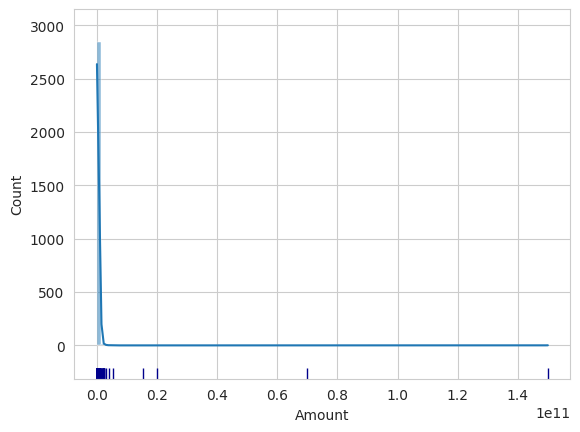

In [ ]:
#Funding amount distribution.
sns.rugplot(data=data, x='Amount', height=0.03, color='darkblue')
sns.histplot(data=data, x='Amount',bins=100, kde=True)
plt.show()   #amount heavily skewed to the right.

In [ ]:
data["Sector"].describe()

count        2851
unique        622
top       FinTech
freq          339
Name: Sector, dtype: object

In [ ]:
data["Stage"].describe()

count            2856
unique             57
top       Undisclosed
freq              933
Name: Stage, dtype: object



Questions

1. How does funding vary across the years? Are there any specific years where funding showed a significant increase or decrease?
2. What are the top 3 companies and their sectors with the highest funding for each year?
3. Is there a correlation between the total amount of funding in a sector and the number of startups in the sector?
4. What is the distribution of funding across different stages of start-up growth during the specified time period?
5. Which Cities of startup headquarters What are the top 10 headquarter cities with the highest funding.


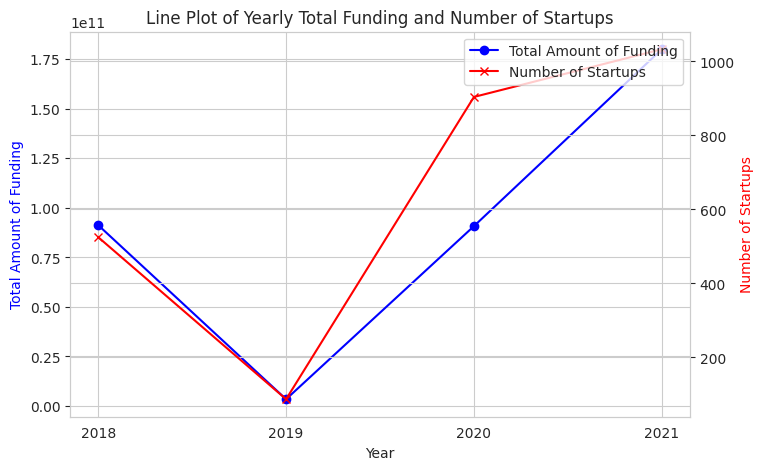

In [ ]:
#Answer 1
yearly = data.groupby('Year')['Amount'].sum().reset_index()
Number_of_startups = data.groupby('Year')['Company_Brand'].nunique()
yearly_total = yearly.merge(right=Number_of_startups, on='Year', how='inner')

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(yearly_total['Year'], yearly_total['Amount'], color='b', marker='o', label='Total Amount of Funding')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Amount of Funding', color='b')

# Create a secondary y-axis for the second variable (right)
ax2 = ax1.twinx()
ax2.plot(yearly_total['Year'], yearly_total['Company_Brand'], color='r',
                    marker='x', label='Number of Startups')
ax2.set_ylabel('Number of Startups', color='r')

# Show a single legend for both variables
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xticks(yearly_total.Year.unique())
# Show the plot
plt.title('Line Plot of Yearly Total Funding and Number of Startups')
plt.show()

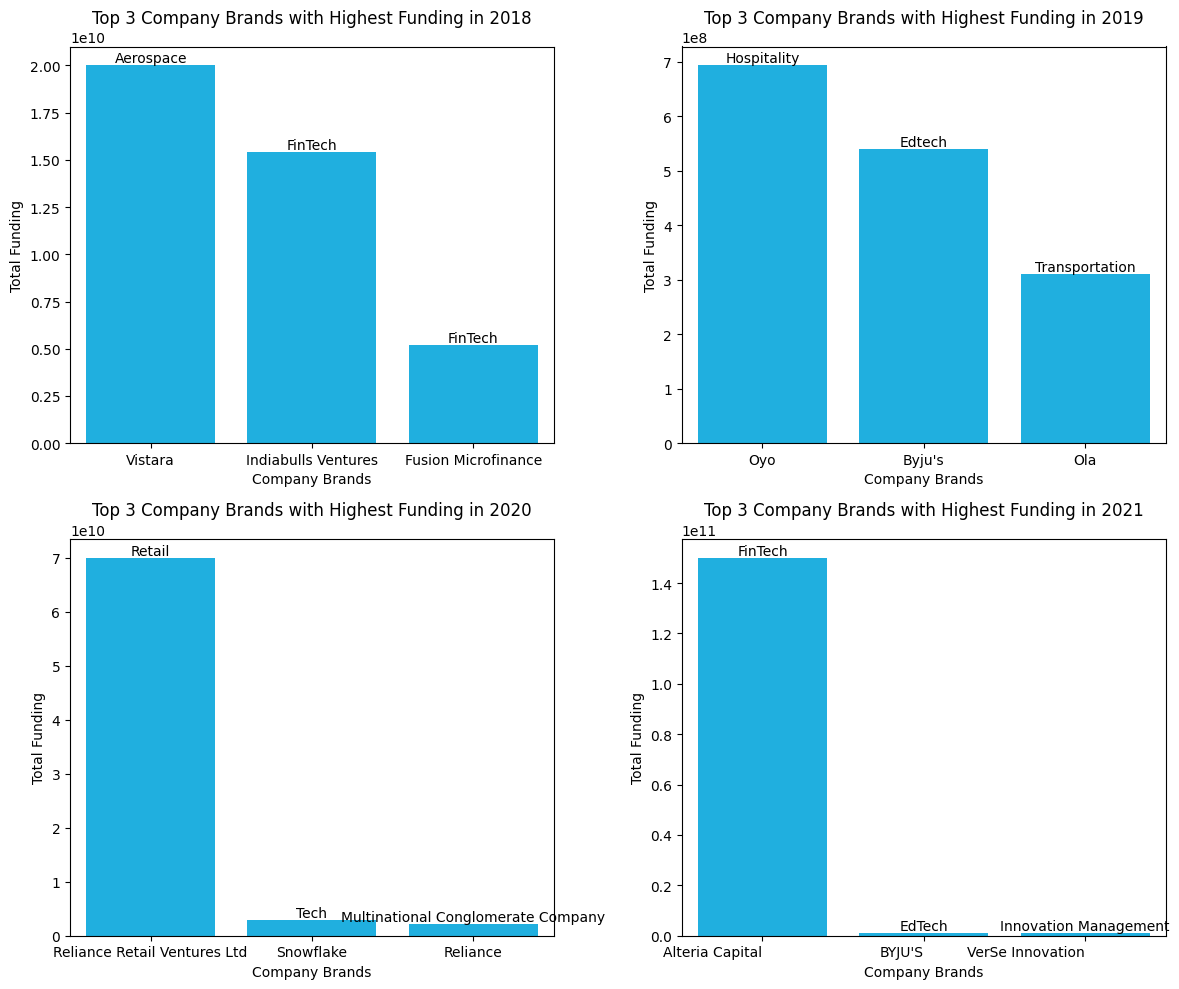

In [ ]:
# Answer 2
# Get the top 3 "Company_Brands" with the highest total "Amount" for each "Year"
top_3_brands_per_year = data.groupby(['Year', 'Company_Brand', 'Sector'])['Amount'].sum().reset_index()
top_3_brands_per_year = top_3_brands_per_year.groupby('Year').apply(lambda x: x.nlargest(3, 'Amount')).reset_index(drop=True)

# Create a 2x2 grid of plots for each year
years = top_3_brands_per_year['Year'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Use the same color for all the bars in each plot
bar_color = 'deepskyblue'

for i, year in enumerate(years):
    data_year = top_3_brands_per_year[top_3_brands_per_year['Year'] == year]

    # Create x-axis labels in the format "Company_Brand (Sector)"
    xtick_labels = [f"{brand}" for brand in data_year['Company_Brand']]

    sns.barplot(x=xtick_labels, y='Amount', data=data_year, color=bar_color, ax=axes[i])
    axes[i].set_title(f'Top 3 Company Brands with Highest Funding in {year}')
    axes[i].set_xlabel('Company Brands')
    axes[i].set_ylabel('Total Funding')

    # Add sector names on top of the bars
    for index, value in enumerate(data_year['Amount']):
        sector_name = data_year.iloc[index]['Sector']
        axes[i].text(index, value, sector_name, ha='center', va='bottom', fontsize=10, color='black')

# Set xticks rotation and alignment
plt.setp(axes[-1].xaxis.get_majorticklabels(), ha='right')

plt.tight_layout()
plt.show()

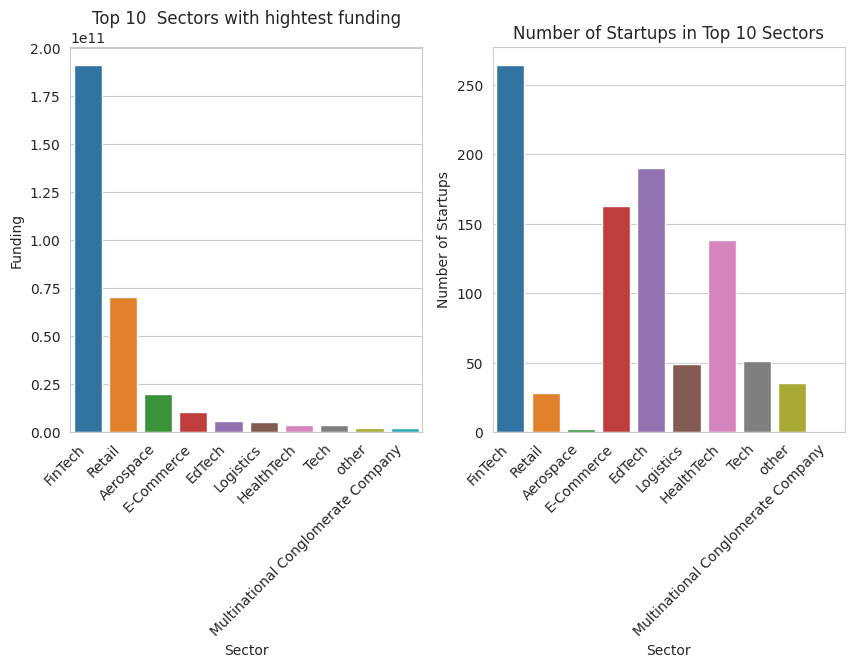

In [ ]:
 #Answer 3

funding_per_sector = data.groupby('Sector')['Amount'].sum().reset_index()
top_10_sectors = funding_per_sector.nlargest(10, "Amount")
top_10_data = data[data.Sector.isin(top_10_sectors.Sector)]
num_of_startups = top_10_data.groupby('Sector')['Company_Brand'].nunique()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x="Sector", y="Amount", data=top_10_sectors)
plt.title("Top 10  Sectors with hightest funding")
plt.ylabel("Funding")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=num_of_startups.index, y=num_of_startups.values, order=top_10_sectors.Sector)
plt.ylabel("Number of Startups")
plt.xticks(rotation=45, ha='right')
plt.title('Number of Startups in Top 10 Sectors')

plt.show()

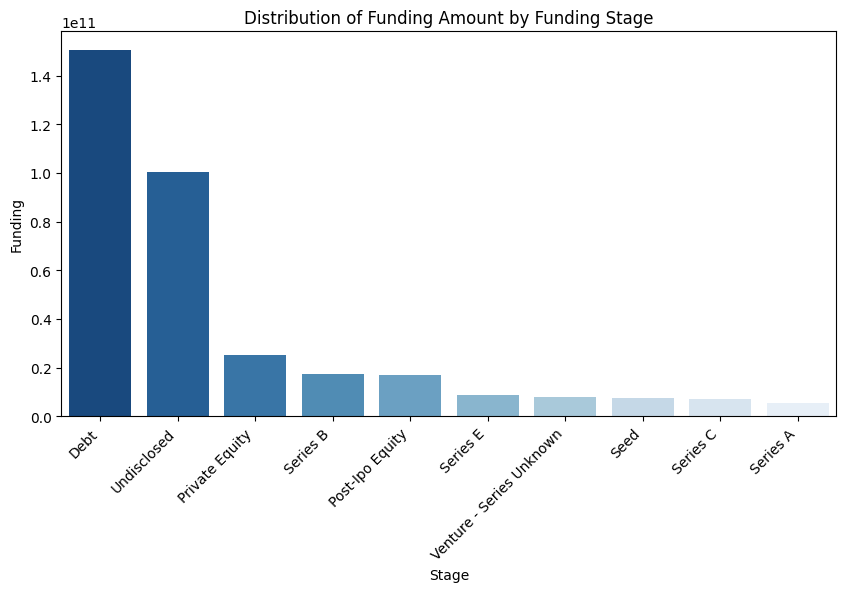

In [ ]:
#Answer 4
funding_per_stages = data.groupby('Stage')["Amount"].sum().reset_index()
top_10_stages = funding_per_stages.nlargest(10, 'Amount')

plt.figure(figsize=(10, 5))
palette = sns.color_palette("Blues_r", n_colors=10)
sns.barplot(x='Stage', y='Amount', data=top_10_stages, palette=palette)
plt.title("Top 10 Stages with Highest Funding")
plt.ylabel("Funding")
plt.xticks(rotation=45, ha='right')

plt.title('Distribution of Funding Amount by Funding Stage')

plt.show()


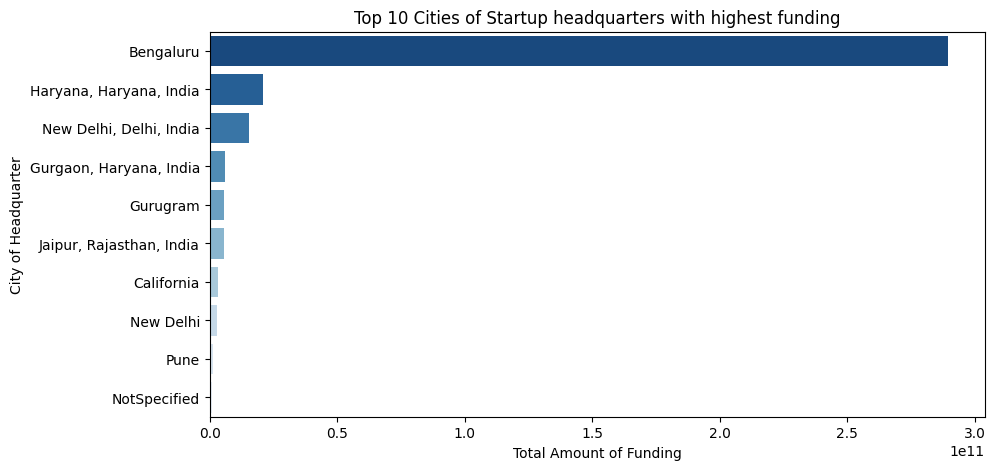

In [ ]:
#Answer 5

top_10_headquarters = data.groupby('HeadQuarter')['Amount'].sum().reset_index().nlargest(10, 'Amount')

plt.figure(figsize=(10, 5))
palette = sns.color_palette("Blues_r", n_colors=10)
sns.barplot(x='Amount', y='HeadQuarter', data=top_10_headquarters, palette=palette)
plt.title('Top 10 Cities of Startup headquarters with highest funding')
plt.ylabel('City of Headquarter')
plt.xlabel('Total Amount of Funding')
plt.show()

#Hypothesis

*H0*: The mean amount of funding received among sectors are equal.

*H1*:  The mean amount of funding received among sectors are not equal.


In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(data['Amount'])

# Print the results
print("Shapiro-Wilk Test")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Check the result against the significance level (0.05)
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

Shapiro-Wilk Test
Test Statistic: 0.015618681907653809
p-value: 0.0
The data is not normally distributed (reject H0)


In [ ]:
from scipy.stats import f_oneway

# Encoding categorical values into numerical labels
category_labels, category_levels = pd.factorize(data['Sector'])

# Performing ANOVA test
result = f_oneway(data['Amount'][category_labels == 0],
                  data['Amount'][category_labels == 1],
                  data['Amount'][category_labels == 2],
                  data['Amount'][category_labels == 3],
                  data['Amount'][category_labels == 4],
                  data['Amount'][category_labels == 5],
                  data['Amount'][category_labels == 6],
                  data['Amount'][category_labels == 7],
                  data['Amount'][category_labels == 8],
                  data['Amount'][category_labels == 9],
                  data['Amount'][category_labels == 10],
                  data['Amount'][category_labels == 11],
                  data['Amount'][category_labels == 12],
                  data['Amount'][category_labels == 13],
                  data['Amount'][category_labels == 14],
                  data['Amount'][category_labels == 15],
                  data['Amount'][category_labels == 16],
                  data['Amount'][category_labels == 17],
                  data['Amount'][category_labels == 18])

# Extracting ANOVA test statistics
f_statistic = result.statistic
p_value = result.pvalue

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check the result against the significance level (0.05)
alpha = 0.05
if p_value > alpha:
    print("There is no significant difference between the means of the variables (fail to reject H0)")
else:
    print("There is significant difference between the means of the varibles (reject H0)")

F-Statistic: 0.09600841677174603
P-Value: 0.9999996317815476
There is no significant difference between the means of the variables (fail to reject H0)


Based on the results of the ANOVA test with the following statistics:

* *F-Statistic: 0.09600841677174603*

* *P-Value: 0.9999996317815476*

We can conclude that there is no significant difference in the 'Amount($)' variable among the different 'Sector' categories. The p-value (0.999) is greater than the typical significance level of 0.05, indicating that the observed differences in means are not statistically significant.

Also, we cannot reject the null hypothesis, which suggests that the 'Sector' within which the startup operates does not have a significant influence on the funding it receives.

Thus, the analysis suggests that, within the scope of the provided data, the 'Sector' does not play a significant role in determining the funding received by startups.

Before using the Parametric Test, such as t-tests, ANOVA (analysis of variance), linear regression, etc., assume that the data follows a normal distribution. If the data is not approximately normal, the results of these tests may be unreliable or misleading. Therefore, let Firstly check the Normality Of our Data before the hypothesis test we will be using The Shapiro-Wilk test which is a popular statistical test for checking normality. It assesses whether a dataset significantly deviates from a normal distribution and The Kolmogorov-Smirnov test compares the data's cumulative distribution function to the expected normal distribution's cumulative distribution function to check the Normality of the Data.

In [ ]:
from scipy import stats

dat = data["Amount"].tolist()
stat, p = stats.shapiro(dat)
alpha = 0.05

if p > alpha:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")


Data does not appear to be normally distributed.


In [ ]:
dat = data["Amount"].tolist()
stat, p = stats.kstest(dat, 'norm')

alpha = 0.05
if p > alpha:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")


Data does not appear to be normally distributed.


Let's Check the 2nd Assumption of the Homogeneity of our Datas where we will be using some statistical tests such as Levene's test which is widely used test for checking the homogeneity of variances. It compares the variances of multiple groups to determine if they are significantly different and also The Fligner-Killeen test which is a non-parametric alternative to Levene's test, suitable for non-normally distributed data.

In [ ]:
from scipy import stats

data_group1 = data['Amount']
data_group2 = data['Year']
data_group3 = data['Founded']

stat, p = stats.levene(data_group1, data_group2, data_group3)

alpha = 0.05
if p > alpha:
    print("The variances are homogeneous.")
else:
    print("The variances are not homogeneous.")


The variances are not homogeneous.


In [ ]:
data_group1 = data['Amount']
data_group2 = data['Year']
data_group3 = data['Founded']


 # 1. Numerical Data:
# Verify that each group contains continuous numerical data
print("Group 1 data:")
print(data_group1.head())
print("\nGroup 2 data:")
print(data_group2.head())
print("\nGroup 3 data:")
print(data_group3.head())


Group 1 data:
0      250000.0
1    40000000.0
2    65000000.0
3     2000000.0
4     6000000.0
Name: Amount, dtype: float64

Group 2 data:
0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year, dtype: int64

Group 3 data:
0    9999
1    9999
2    9999
3    9999
4    9999
Name: Founded, dtype: int64


In [ ]:
# 2. Homogeneity of Variances: Using the Fligner-Killeen test to check for homogeneity of the data
stat, p = stats.fligner(data_group1, data_group2, data_group3)

alpha = 0.05
print("\nFligner-Killeen Test:")
print("Test Statistic:", stat)
print("p-value:", p)

if p > alpha:
    print("The variances are homogeneous.")
else:
    print("The variances are not homogeneous.")


Fligner-Killeen Test:
Test Statistic: 5566.631521057964
p-value: 0.0
The variances are not homogeneous.


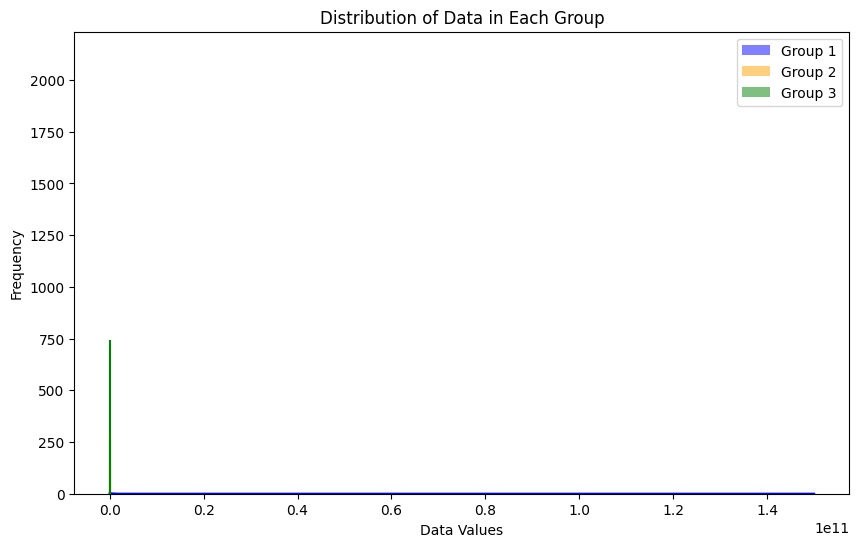

In [ ]:
# 3. Similar Distributions: Visualize the distributions of each group
plt.figure(figsize=(10, 6))
sns.histplot(data_group1, kde=True, label='Group 1', color='blue')
sns.histplot(data_group2, kde=True, label='Group 2', color='orange')
sns.histplot(data_group3, kde=True, label='Group 3', color='green')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Distribution of Data in Each Group')
plt.legend()
plt.show()

Let's check for non Parametric tests and here we will employ the Kruskal Wallis test. The Kruskal-Wallis test is a non-parametric alternative to one-way ANOVA and is used to compare the medians of different groups when the data does not meet the assumptions of normality and homogeneity of variances as we have seen from the previous above tests.

In [ ]:
data_group1 = data['Sector'].tolist()
data_group2 = data['Stage'].tolist()
# Perform the Kruskal-Wallis test
stat, p = stats.kruskal(data_group1, data_group2)

alpha = 0.05
print("Kruskal-Wallis Test:")
print("Test Statistic:", stat)
print("p-value:", p)

if p > alpha:
    print("The variances are homogeneous (no significant difference).")
else:
    print("The variances are not homogeneous (significant difference).")

Kruskal-Wallis Test:
Test Statistic: 2673.4225372664973
p-value: 0.0
The variances are not homogeneous (significant difference).


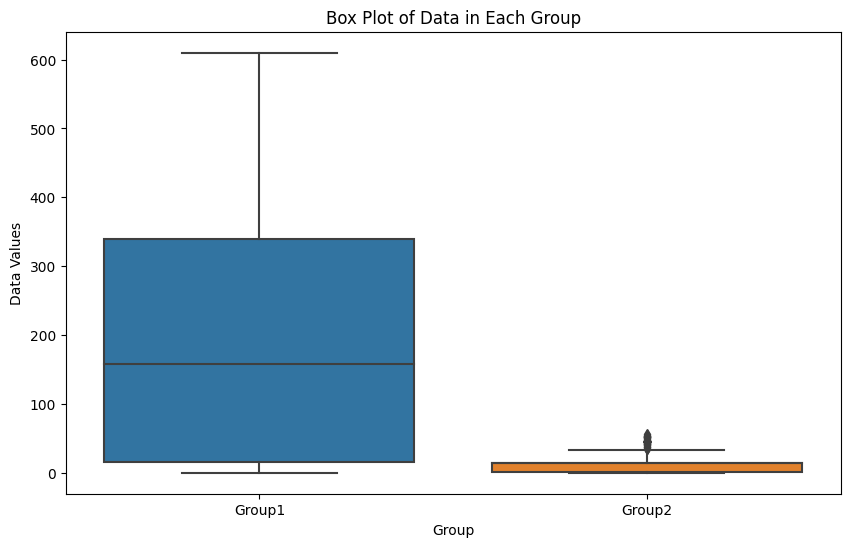

In [ ]:
# 1. let's Encode the categorical data to numerical representations
data_group1_encoded, _ = pd.factorize(data_group1)
data_group2_encoded, _ = pd.factorize(data_group2)

# 2. Let's Create a DataFrame with encoded data
df_encoded = pd.DataFrame({
    'Group1': data_group1_encoded,
    'Group2': data_group2_encoded
})

# 3. which is Lastly let Plot the boxplot using the created encoded DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded)
plt.xlabel('Group')
plt.ylabel('Data Values')
plt.title('Box Plot of Data in Each Group')
plt.show()


We use stats.kruskal() to perform the Kruskal-Wallis test, comparing the distributions of the two groups(Sectors, stage). The test statistic and p-value are printed.
We set a significance level (alpha = 0.05) and use it to make a decision about the homogeneity of variances based on the p-value.
We visualize the distributions of each group using a box plot. Box plots allow us to compare the medians and distributions of the data across groups.
The Kruskal-Wallis test does not assume normality or equal variances and is appropriate for non-parametric data. If the p-value is greater than alpha, you fail to reject the null hypothesis, indicating that the variances are homogeneous (no significant difference among the groups). If the p-value is less than or equal to alpha, you reject the null hypothesis, suggesting that the variances are not homogeneous (significant difference among the groups). whereas is our case we have a significant difference among two groups( Sector, and Stage) to mean that their variance are not homogenious and our P-value is less than the alpha which led us to reject the null Hypothesis. Therefore we Conclude That the sector within which the startup finds itself influences the amount of funding it would receive.